In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import fastbook
import os

# Import the Path class from pathlib
from pathlib import Path

# Modify the fastbook setup to accommodate the actual mount path
def custom_setup_colab():
  """
  Custom setup for Google Colab to use the correct mount path.
  """
  gdrive = Path('/content/drive/My Drive') # Use the correct path where Google Drive is mounted
  from google.colab import drive
  if not gdrive.exists():
    drive.mount(str(gdrive.parent))

# Replace the original setup function with the custom one
fastbook.setup_colab = custom_setup_colab

fastbook.setup_book()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Create the .kaggle directory in Colab
!mkdir -p ~/.kaggle

!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d google/google-patent-phrase-similarity-dataset

Dataset URL: https://www.kaggle.com/datasets/google/google-patent-phrase-similarity-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
google-patent-phrase-similarity-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
os.listdir()

['.config',
 'train.csv',
 'validation.csv',
 'google-patent-phrase-similarity-dataset.zip',
 'outputs',
 'test.csv',
 'drive',
 'sample_data']

In [ ]:
import zipfile

with zipfile.ZipFile('google-patent-phrase-similarity-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import os
os.listdir()

['.config',
 'train.csv',
 'validation.csv',
 'google-patent-phrase-similarity-dataset.zip',
 'outputs',
 'test.csv',
 'drive',
 'sample_data']

In [ ]:
from fastai.imports import *

In [ ]:
from pathlib import Path

# Check if running in Kaggle environment
if 'IS_KAGGLE' in os.environ:  # Check for the environment variable
    path = Path('../input/google-patent-phrase-similarity-dataset')
else:  # Running locally
    # Example: Set path to your local directory with the data
    path = Path('./google-patent-phrase-similarity-dataset')


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
# Read all of the training data
df_full = pd.read_csv('train.csv')

In [ ]:
df_full

,anchor,target,rating,score,context
0,aralkynyl,cholesterol,1d,0.25,C09
1,aralkynyl,aralkyl,1d,0.25,C09
2,aralkynyl,heterocycle,1c,0.25,C09
3,aralkynyl,acyl,1d,0.25,C09
4,aralkynyl,heterocyclic,1c,0.25,C09
...,...,...,...,...,...
36468,offset table,coffee table,0,0.00,G06
36469,offset table,table glass,0,0.00,G06
36470,offset table,counter block,0,0.00,G06
36471,offset table,periodic table,0,0.00,G06


In [ ]:
# Randomly sample 5% of the data to allow for a sreasonable run time
df = df_full.sample(frac=0.05)  # 5% of the full dataset

In [ ]:
df

,anchor,target,rating,score,context
33511,gate location,logic gates,1c,0.25,G01
18670,hardware blocks,blockchain,0,0.00,H04
18049,make of high density polyethylene,density formula,0,0.00,H02
31660,polls,poll maker,0,0.00,G01
15573,insulation sleeve,igniter,1d,0.25,C06
...,...,...,...,...,...
25130,tetracene,aromatic hydrocarbon,1c,0.25,C12
441,conductor particles,guides,1d,0.25,B01
30226,scratch coating,synthetic coating,1b,0.25,A63
26820,filled interior,surface enclosure,1c,0.25,A61


In [ ]:
# Read the test data
eval_df = pd.read_csv('test.csv')
len(eval_df)

9232

In [ ]:
eval_df

,anchor,target,rating,score,context
0,non invasive apparatus,surgical device,1a,0.25,A61
1,non invasive apparatus,surgical apparatus,1a,0.25,A61
2,non invasive apparatus,therapeutic device,2b,0.50,A61
3,non invasive apparatus,invasive apparatus,2b,0.50,A61
4,non invasive apparatus,electronic blood pressure monitor,2a,0.50,A61
...,...,...,...,...,...
9227,weak base,sodium hydroxide,1a,0.25,C09
9228,weak base,weak muscle,0,0.00,C09
9229,weak base,weak heart,0,0.00,C09
9230,weak base,strong hair,0,0.00,C09


In [ ]:
# Check the target column of the training data
df.target.value_counts()

,count
target,
transmission,3
motor,3
transfer,2
metal,2
peripheral neuropathy,2
...,...
marine vessel,1
thin forms,1
request buffer,1


In [ ]:
# Check the anchor column of the training data
df.anchor.value_counts()

,count
anchor,
average pore size,12
instruction processing,11
component composite coating,9
dual clutch,9
dimensional location,9
...,...
buck converter circuit,1
ecn,1
dicy,1


In [ ]:
# Check the context column of the training data
df.context.value_counts()

,count
context,
H01,126
H04,114
G01,95
A61,59
C07,53
...,...
B31,2
F41,2
A62,1


In [ ]:
df['section'] = df.context.str[0]
df.section.value_counts()

,count
section,
B,364
H,336
G,297
C,282
A,203
F,193
E,90
D,59


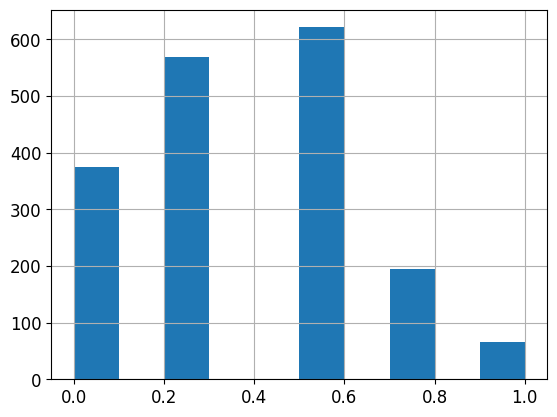

In [ ]:
df.score.hist();

In [ ]:
df[df.score==1]

,anchor,target,rating,score,context,section
29097,embedding groove,embedded groove,4,1.0,F23,F
9064,cyclic alcohols,cyclic alcohol,4,1.0,C10,C
30992,water intake,water intake,4,1.0,B63,B
35650,display object,display objects,4,1.0,A63,A
17236,moisture proof film,moistureproof film,4,1.0,H05,H
...,...,...,...,...,...,...
3615,include displacement,include displacement,4,1.0,B23,B
8575,panel frame,frame panel,4,1.0,E06,E
16468,rotation protrusion,rotational protrusion,4,1.0,F16,F
22524,synthetic training,synthetic training,4,1.0,G06,G


In [ ]:
# Read validation data set into panda data frame
valid_df = pd.read_csv('validation.csv')
len(valid_df)

2843

In [ ]:
valid_df

,anchor,target,rating,score,context
0,substantial amounts,amounts,2b,0.5,C22
1,substantial amounts,traces,0,0.0,C22
2,substantial amounts,high amounts,2b,0.5,C22
3,substantial amounts,high quantities,2b,0.5,C22
4,substantial amounts,large quantities,2b,0.5,C22
...,...,...,...,...,...
2838,water oil,soda water,0,0.0,B01
2839,water oil,fat individual,0,0.0,B01
2840,water oil,air conditioner,0,0.0,B01
2841,water oil,water droplet,0,0.0,B01


In [ ]:
# Create "section" column for validation data also
valid_df['section'] = valid_df.context.str[0]

In [ ]:
from torch.utils.data import DataLoader
import warnings,transformers,logging,torch
from transformers import TrainingArguments,Trainer
from transformers import AutoModelForSequenceClassification,AutoTokenizer

In [ ]:
!pip install -q datasets
import datasets
from datasets import load_dataset, Dataset, DatasetDict

In [ ]:
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [ ]:
# Alternate model, distilbert-base-uncased
#model_nm = 'distilbert-base-uncased'

In [ ]:
model_nm = 'microsoft/deberta-v3-small'

In [ ]:

tokz = AutoTokenizer.from_pretrained(model_nm)

In [ ]:
sep = tokz.sep_token
sep

'[SEP]'

In [ ]:
# Setting up "input" column
df['inputs'] = df.context + sep + df.anchor + sep + df.target
valid_df['inputs'] = valid_df.context + sep + valid_df.anchor + sep + valid_df.target

In [ ]:
# Setting up datasets and renaming "score" column to "label"
ds = Dataset.from_pandas(df).rename_column('score', 'labels')
valid_ds = Dataset.from_pandas(valid_df).rename_column('score', 'labels')
eval_ds = Dataset.from_pandas(eval_df)

In [ ]:
def tok_func(x): return tokz(x["inputs"])

In [ ]:
tok_func(ds[0])

{'input_ids': [1, 1098, 3085, 2, 5502, 1250, 2, 5506, 10058, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:

tokz.all_special_tokens

['[CLS]', '[SEP]', '[UNK]', '[PAD]', '[MASK]']

In [ ]:
# Print first entry in data set to check columns
ds[0]

{'anchor': 'gate location',
 'target': 'logic gates',
 'rating': '1c',
 'labels': 0.25,
 'context': 'G01',
 'section': 'G',
 'inputs': 'G01[SEP]gate location[SEP]logic gates',
 '__index_level_0__': 33511}

In [ ]:
# Remove columns we aren't using anymore
inps = "anchor","target","context"
tok_ds = ds.map(lambda x:x, remove_columns=['anchor','target','context','rating','section'])
tok_valid_ds = valid_ds.map(lambda x:x, remove_columns=['anchor', 'target', 'context','rating', 'section'])

Map:   0%|          | 0/1824 [00:00<?, ? examples/s]

Map:   0%|          | 0/2843 [00:00<?, ? examples/s]

In [ ]:
# Print first entry in data set to check columns
ds[0]

{'anchor': 'gate location',
 'target': 'logic gates',
 'rating': '1c',
 'labels': 0.25,
 'context': 'G01',
 'section': 'G',
 'inputs': 'G01[SEP]gate location[SEP]logic gates',
 '__index_level_0__': 33511}

In [ ]:
tok_ds[0]

{'labels': 0.25,
 'inputs': 'G01[SEP]gate location[SEP]logic gates',
 '__index_level_0__': 33511}

In [ ]:
tok_valid_ds[0]

{'labels': 0.5, 'inputs': 'C22[SEP]substantial amounts[SEP]amounts'}

In [ ]:
# Create Hugging Face dataset object with training and validation sets
dds = DatasetDict({"train":tok_ds,
             "test": tok_valid_ds})

In [ ]:
# Apply tokenization
dds = dds.map(tok_func, batched=True)

Map:   0%|          | 0/1824 [00:00<?, ? examples/s]

Map:   0%|          | 0/2843 [00:00<?, ? examples/s]

In [ ]:
# Print keys to check for "input_ids"
print(dds.keys())

dict_keys(['train', 'test'])


In [ ]:
# Train model

In [ ]:
def corr(eval_pred): return {'pearson': np.corrcoef(*eval_pred)[0][1]}

In [ ]:
# Define learning rate, batch size, weight decay, and epochs
lr,bs = 2e-3,256
wd,epochs = 0.01,4

In [ ]:
# Print learning rate that is in scientific format
print(2e-3)

0.002


In [ ]:
# Define training function
def get_trainer(dds):
    args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
        evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
        num_train_epochs=epochs, weight_decay=wd, logging_steps=100)
    model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)
    return Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
                   tokenizer=tokz, compute_metrics=corr)

In [ ]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=wd,
    logging_steps=100)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)
trainer = Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
               tokenizer=tokz, compute_metrics=corr)

In [ ]:
%%time
trainer.train();

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
# Improving the model

In [ ]:
# def get_dds(df):
#     ds = Dataset.from_pandas(df).rename_column('score', 'label')
#     tok_ds = ds.map(tok_func, batched=True, remove_columns=inps+('inputs','id','section'))
#     return DatasetDict({"train":tok_ds.select(trn_idxs), "test": tok_ds.select(val_idxs)})

In [ ]:
# def get_model(): return AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

# def get_trainer(dds, model=None):
#     if model is None: model = get_model()
#     args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
#         evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
#         num_train_epochs=epochs, weight_decay=wd, report_to='none')
#     return Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
#                    tokenizer=tokz, compute_metrics=corr)

In [ ]:
# sep = " [s] "
# df['inputs'] = df.context + sep + df.anchor + sep + df.target
# dds = get_dds(df)

In [ ]:
# get_trainer(dds).train()

In [ ]:
# df['inputs'] = df.inputs.str.lower()
# dds = get_dds(df)
# get_trainer(dds).train()

In [ ]:
# df['sectok'] = '[' + df.section + ']'
# sectoks = list(df.sectok.unique())
# tokz.add_special_tokens({'additional_special_tokens': sectoks})

In [ ]:
# df['inputs'] = df.sectok + sep + df.context + sep + df.anchor.str.lower() + sep + df.target
# dds = get_dds(df)

In [ ]:
# model = get_model()
# model.resize_token_embeddings(len(tokz))

In [ ]:
# trainer = get_trainer(dds, model=model)
# trainer.train()